In [2]:
# module 설치
# pip 이용해서 설치
# pip 명령은 command 명령
# jupyter notebook 환경에서는 pip 명령을 직접 사용 붚가
# colab에서 terminal 명령어를 이용하려면
# ! 을 사용한다

!pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.9 MB/s eta 0:00:00


In [3]:
# Logistic Regression
# 예

import numpy as np
from sklearn import linear_model
import mglearn # 데이터 셋을 가져오기 위한 용도의 utility module
import matplotlib.pyplot as plt

In [7]:
# Training Set 로딩
(x,y) = mglearn.datasets.make_forge()

print(x) # x는 2차원 ndarray
print(type(x)) # <class 'numpy.ndarray'> : numpy에 있는 ndarray라는 객체
print(x.shape) # (26, 2) 데이터가 어떻게 생겼는지 알 수 있음

# 이 x 데이터를 2차원 평면상에 좌표값으로 사용
# 즉, 첫번째 컬럼을 x축, 두번쨰 컬럼을 y축으로 점찍을 것


print(y) # <class 'numpy.ndarray'>
print(type(y)) # (26,) : 1차원인 ndarray
print(y.shape)

# 이 y 데이터를 이용해 아까 x 데이터에 대한 점을 찍을 때 0과 1을 구분해서 찍을 것임
# 어떻게?
# 0과 1을 다른 형태의 점으로 찍을 것임

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
<class 'numpy.ndarray'>
(26, 2)
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
<class 'numpy.ndarray'>
(26,)


[ 9.96346605 11.0329545  11.54155807  8.69289001  8.1062269   8.30988863
 11.93027136  9.67284681  8.34810316  8.67494727  9.17748385 10.24028948
  8.68937095  8.92229526  9.49123469  9.25694192  7.99815287  8.18378052
  8.7337095   9.32298256 10.06393839  9.50048972  8.34468785  9.50169345
  9.15072323 11.563957  ]
[[ 9.96346605]
 [11.0329545 ]
 [11.54155807]
 [ 8.69289001]
 [ 8.1062269 ]
 [ 8.30988863]
 [11.93027136]
 [ 9.67284681]
 [ 8.34810316]
 [ 8.67494727]
 [ 9.17748385]
 [10.24028948]
 [ 8.68937095]
 [ 8.92229526]
 [ 9.49123469]
 [ 9.25694192]
 [ 7.99815287]
 [ 8.18378052]
 [ 8.7337095 ]
 [ 9.32298256]
 [10.06393839]
 [ 9.50048972]
 [ 8.34468785]
 [ 9.50169345]
 [ 9.15072323]
 [11.563957  ]]


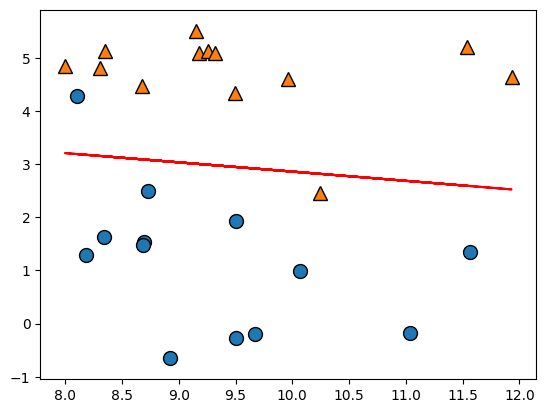

In [10]:
# 직접 그래프를 그리면 힘들기 때문에
# mglearn이 가지고 있는 산점도로 그래프를 그릴 것임

mglearn.discrete_scatter(x[:,0], x[:,1], y) # (x축에 들어갈 데이터, y축에 들어갈 데이터, 0인지 1인지 구분할 데이터)



# 이 상태에서 Linear Regression Model 만들기
# x 데이터 첫번째 컬럼을 x축으로,두번째 컬럼을 y축으로

model = linear_model.LinearRegression()

print(x[:,0]) # 1차원 array 이기 떄문에, 모델에 넣어 학습시키기에는 부적합( 왜? 2차원 array가 들어가야 하기 때문에)
# 따라서
print(x[:,0].reshape(-1, 1)) # reshape으로 형태를 변환해주어야 한다

model.fit(x[:,0].reshape(-1,1),
          x[:,1].reshape(-1,1))

# 이 model은 독립변수가 1개인 linear model 이기 때문에 모델은 1차 직선이 된다
# 1차 직선의 기울기는 우리가 구현하고자 하는 weight가 되고
# 1차 직선의 절편은 우리가 구현한 bias가 된다

plt.plot(x[:,0], x[:,0] * model.coef_.ravel() + model.intercept_, color='r')
# model.coef_ 는 2차원으로 나올 수 밖에 없기 때문에
# 무엇이든지 1차원으로 만들어주는 ravel() 함수를 사용하여 1차원으로 만들어주어야한다



plt.show()
# 이 때 만들어진 직선은 분류를 하게 하는 직선이다.
# 즉, 분류의 기준선

In [14]:
# Linear Regression
# 구현

import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

[[0.63265306]]


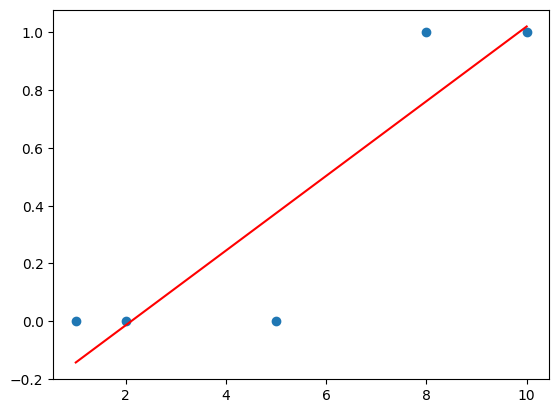

In [16]:
# Training Data Set
x_data = np.array([1,2,5,8,10]) # 공부시간
t_data = np.array([0,0,0,1,1]) # 합격 여부(0 : Fail, 1 : Pass)

model = linear_model.LinearRegression()
model.fit(x_data.reshape(-1,1),
          t_data.reshape(-1,1))

# prediction -> 7시간 공부하면 합격인가요?
print(model.predict([[7]])) # 중첩 array로 넣어주어야 한다 # 예측값 : [[0.63265306]] 약, 63% 확률로 합격일 것이다


plt.scatter(x_data, t_data)
plt.plot(x_data, x_data * model.coef_.ravel() + model.intercept_, color='r')

plt.show()


# 우리가 어떤 데이터를 가지고 있느냐에 따라서 결과 값이 아예 달라질 수 있기 때문에
# Linear Regression으로 분류를 하는데는 오류가 있을 수 있다
# 또 한계는, x 값이 커질 때 y 값이 확률인데도 불구하고 1을 넘어간다는 것이다

In [17]:
 # 이를 해결한 것이 바로 logistic Regression Model
 # Sigmoid 함수를 이용해서 y 값이 0~1 사이의 값만 나오게 만든다

In [26]:
# Logistic Regression Tensorflow Keras와 sklearn으로 구현

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from sklearn import linear_model

In [27]:
# Training Data Set
x_data = np.arange(2,21,2).reshape(-1,1)
t_data = np.array([0,0,0,0,0,0,1,1,1,1])

In [28]:
# sklearn부터 구현

# 종속변수를 보니까 Logistic 을 해야한다
# 따라서 밑에 함수가 아닌
# sklenr_model = linear_model.LinearRegression()

# Logistic Regression 함수를 사용한다
sklearn_model = linear_model.LogisticRegression()

# sklearn을 이용해서 LogisticRegression을 구현할 때 입력으로 들어가는
# 종속변수(target)은 1차원으로 처리해야한다
# tensorflow에서는 2창원 사용
sklearn_model.fit(x_data, t_data.ravel())


# 13시간 공부하면 합격인가요?
print(sklearn_model.predict([[13]])) # 2차원으로 들어가야함 -> 0이 나오므로 불합격으로 판별
print(sklearn_model.predict_proba([[13]])) # 확률로 알고싶다면 predict_proba를 사용해준다 # [[0.50009391 0.49990609]] : 첫번째 컬럼(0일 확률), 두번째 컬럼(1일 확률)

[0]
[[0.50009391 0.49990609]]


In [32]:
# Tensorflow keras 구현

keras_model = Sequential()

# add를 이용해서 첫번째 레이어인 Flatten 레이어부터 넣는다(input layer)
keras_model.add(Flatten(input_shape=(1,)))
# add를 이용해서 두번째 레이어인 Dense 레이어를 넣는다(output layer)
keras_model.add(Dense(units=1,
                      activation='sigmoid'))

keras_model.compile(optimizer=SGD(learning_rate=1e-3),
                    loss='binary_crossentropy') # 이진분류 -> binary_crossentropy


keras_model.fit(x_data,
                t_data,
                epochs=500,
                verbose=1)

print(keras_model.predict([[13]]))  # [[0.6082352]]

Epoch 1/500
1/1 [==============================] - 1s 524ms/step - loss: 6.0519
Epoch 2/500
1/1 [==============================] - 0s 14ms/step - loss: 6.0340
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 6.0161
Epoch 4/500
1/1 [==============================] - 0s 16ms/step - loss: 5.9982
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 5.9804
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 5.9625
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 5.9446
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 5.9267
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 5.9088
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 5.8909
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 5.8730
Epoch 12/500
1/1 [==============================] - 0s 10ms/step - loss: 5.8552
Epoch 13/500
1/1 [==============================] -

In [33]:
# 주어진 데이터를 이용해
# Logistic Regression 구현

# Tensorlow Keras 와 scikit-learn으로 둘 다 구현
# 후에 Prediction 해보기

# GRE, GPA, Rank=> 700, 4.0, 3
# 합격인가? 확률값으로 출력하기

In [108]:
# Library import 작업

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

In [130]:
# Raw Data Loading

original = pd.read_csv('/content/drive/MyDrive/KOSA 빅데이터 과정 3차/data/admission/admission.csv')
display(original)


# 데이터 전처리

## 1. NaN값 제거 = 결측치 제거
original.info() # 결측값이 존재하지 않는다

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB


In [129]:
## 2. 이상치 처리
# 이상치 처리 하기 전, boxplot이나 scatter로 확인하기 -> EDA 과정이 필요하다는 것을 깨달음
import matplotlib.pyplot as plt
#plt.boxplot(original['gre'])

# 이상치 처리 시작
# boxplot을 이용한 사분위값으로 처리해도 되지만,
# 코드를 간단히 하기 위해서 zscore 이용해줌
from scipy import stats

zscore_threshold = 2.0
# 기본 틀을 이용해 for 문 돌려서 모든 컬럼에 대해서 처리해주기
# 기본틀 :
# outlier = df1['gre'][np.abs(stats.zscore(df1['gre'])) > zscore_threshold]
# df2 = df1.loc[df1['gre'].isin(outlier, invert=True)]
# 모든 컬럼 : for문 이용
for col in original.columns:
    outlier = df1[col][np.abs(stats.zscore(original[col])) > zscore_threshold]
    df1 = df1.loc[~original[col].isin(outlier)]
print(df1.shape)

(383, 4)


In [114]:
## 3. 정규화
# tensorflow keras 에서는 정규화 필요
# sikit-learn 에서는 정규화 필요 없기 때문에
# 이 과정을 거치기 전에 Training Data Set을 구성해 놓고,
# tensorflow keras 에서만 쓸 정규화 된 x_data를 써놓자

x_data = df1.drop('admit', axis=1, inplace=False).values
t_data = df1['admit'].values.reshape(-1,1)


# 여기서 admit은 0과 1의 값을 가지기 때문에 사실상 정규화를 해줄 필요가 없다
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
# scaler_t = MinMaxScaler()

scaler_x.fit(x_data)
# scaler_t.fit(df1['admit'].values.reshape(-1,1))

x_data_norm = scaler_x.transform(x_data)

In [115]:
##### scikit-learn
from sklearn import linear_model


# Model 만들고 학습 진행
sklearn_model = linear_model.LogisticRegression()
sklearn_model.fit(x_data, t_data.ravel())

sklearn_result = sklearn_model.predict_proba([[600, 3.8, 1]])
print(sklearn_result) # [[0.43740782 0.56259218]] -> 56%의 확률로 합격

[[0.43740782 0.56259218]]


In [116]:
##### Tensorflow Keras Model 구현

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(3,)))

ouput_layer = Dense(units=1,
                    activation='sigmoid')
keras_model.add(ouput_layer)

keras_model.compile(optimizer=SGD(learning_rate=1e-2),
                    loss='binary_crossentropy')

keras_model.fit(x_data_norm,
                t_data,
                epochs=2000,
                verbose=1)


##### 모델을 만든 후, 학습이 끝나면
# 당연히 evaluation(평가)를 진행해야 한다.
# 평가 결과가 어느정도 이상이면 그 때 prediction을 진행해야 한다
# 이 때 기준은 정확도 최소 98% 이상


Epoch 1/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.6446
Epoch 2/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.6406
Epoch 3/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.6369
Epoch 4/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.6337
Epoch 5/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.6307
Epoch 6/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.6280
Epoch 7/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.6257
Epoch 8/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.6235
Epoch 9/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.6215
Epoch 10/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.6198
Epoch 11/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.6181
Epoch 12/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.6167
Epoch 13/2000
12/12 [====

In [117]:
# Prediction 진행
my_data = np.array([[600, 3.8, 1]])
my_data_norm = scaler_x.transform(my_data)

result = keras_model.predict(my_data_norm)

print(result)

1/1 [==============================] - 0s 54ms/step
[[0.58253974]]


In [ ]:
# 1. 우리가 항상 sckikit-learn 구현과 비교해서 우리 모델이 잘 만든
#    모델인지를 판단해야 하나요?
#    => logistic regression부터는 성능평가지표를 이용해서 모델의 성능평가를 진행해야 한다

# 2. 학습이 잘 이루어지지 않은 거 같다
#    loss값도 충분히 작아지지 않고 있다.
#    => 왜 안될까?
#       데이터가 다양하지 않고, 양이 너무 적다